# LangChain: Models, Prompts and Output Parsers


## Outline

 * Direct API calls to OpenAI
 * API calls through LangChain:
   * Prompts
   * Models
   * Output parsers

- Models refers to Language Model (gpt4)
- Prompts refers to the style of creating inputs to pass into models
- Parser taking the output of these model and parsing it to more structured format

## Get your [OpenAI API Key](https://platform.openai.com/account/api-keys)

In [ ]:
#!pip install python-dotenv
#!pip install openai

In [1]:
import os
from openai import OpenAI

## Chat API : OpenAI

Let's start with a direct API calls to OpenAI.

In [10]:
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    client = OpenAI()
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=0, 
    )
    return response.choices[0].message.content


In [11]:
get_completion("What is 1+3?")

'1 + 3 = 4'

In [12]:
customer_email = """
Arrr, I be fuming that me blender lid \
flew off and splattered me kitchen walls \
with smoothie! And to make matters worse,\
the warranty don't cover the cost of \
cleaning up me kitchen. I need yer help \
right now, matey!
"""

In [13]:
style = """American English \
in a calm and respectful tone
"""

In [14]:
prompt = f"""Translate the text \
that is delimited by triple backticks 
into a style that is {style}.
text: ```{customer_email}```
"""

print(prompt)

Translate the text that is delimited by triple backticks 
into a style that is American English in a calm and respectful tone
.
text: ```
Arrr, I be fuming that me blender lid flew off and splattered me kitchen walls with smoothie! And to make matters worse,the warranty don't cover the cost of cleaning up me kitchen. I need yer help right now, matey!
```



In [15]:
response = get_completion(prompt)

In [16]:
response

"Ah, I'm really frustrated that my blender lid flew off and splattered my kitchen walls with smoothie! And to make matters worse, the warranty doesn't cover the cost of cleaning up my kitchen. I could really use your help right now, friend."

In [17]:
chinese_email = "当然可以！\
请问您需要写什么内容的电子邮件？\
例如，商务沟通、个人问候还是其他内容？\
这将有助于我更准确地帮您生成邮件。"

In [18]:
style = "very angry assistant"

In [19]:
prompt = f"""Translate the text \
that is delimited by triple backticks 
into a style that is {style}.
text: ```{chinese_email}```
"""

print(prompt)

Translate the text that is delimited by triple backticks 
into a style that is very angry assistant.
text: ```当然可以！请问您需要写什么内容的电子邮件？例如，商务沟通、个人问候还是其他内容？这将有助于我更准确地帮您生成邮件。```



In [20]:
response = get_completion(prompt)
response

'OF COURSE I CAN HELP! WHAT DO YOU NEED THE EMAIL TO SAY? BUSINESS COMMUNICATION, PERSONAL GREETINGS, OR SOMETHING ELSE? THIS WILL HELP ME ASSIST YOU MORE ACCURATELY IN CREATING THE EMAIL.'

## Chat API : LangChain

Let's try how we can do the same using LangChain.

In [ ]:
#!pip install --upgrade langchain

### Model

In [21]:
from langchain_openai import ChatOpenAI

In [22]:
# To control the randomness and creativity of the generated
# text by an LLM, use temperature = 0.0 (less random)
chat = ChatOpenAI(model="gpt-3.5-turbo", temperature=0.0)
chat

ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x7fb0a6bdd390>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x7fb0a6bdecb0>, temperature=0.0, openai_api_key=SecretStr('**********'), openai_proxy='')

### Prompt template

In [23]:
template_string = """Translate the text \
that is delimited by triple backticks \
into a style that is {style}. \
text: ```{text}```
"""

In [24]:
from langchain.prompts import ChatPromptTemplate

prompt_template = ChatPromptTemplate.from_template(template_string)


In [25]:
prompt_template.messages[0].prompt

PromptTemplate(input_variables=['style', 'text'], template='Translate the text that is delimited by triple backticks into a style that is {style}. text: ```{text}```\n')

In [26]:
prompt_template.messages[0].prompt.input_variables

['style', 'text']

In [27]:
customer_style = """American English \
in a calm and respectful tone
"""

In [28]:
customer_email = """
Arrr, I be fuming that me blender lid \
flew off and splattered me kitchen walls \
with smoothie! And to make matters worse, \
the warranty don't cover the cost of \
cleaning up me kitchen. I need yer help \
right now, matey!
"""

In [29]:
customer_messages = prompt_template.format_messages(
                    style=customer_style,
                    text=customer_email)

In [30]:
print(type(customer_messages))
print(type(customer_messages[0]))

<class 'list'>
<class 'langchain_core.messages.human.HumanMessage'>


In [31]:
print(customer_messages[0])

content="Translate the text that is delimited by triple backticks into a style that is American English in a calm and respectful tone\n. text: ```\nArrr, I be fuming that me blender lid flew off and splattered me kitchen walls with smoothie! And to make matters worse, the warranty don't cover the cost of cleaning up me kitchen. I need yer help right now, matey!\n```\n"


In [32]:
# Call the LLM to translate to the style of the customer message
customer_response = chat(customer_messages)

/home/fulim/projects/langchain-vector_db/langchain-vector_db/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The method `BaseChatModel.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


In [34]:
print(customer_response.content)

I am really frustrated that my blender lid flew off and splattered my kitchen walls with smoothie! And to make matters worse, the warranty doesn't cover the cost of cleaning up my kitchen. I could really use your help right now, friend.


In [35]:
service_reply = """Hey there customer, \
the warranty does not cover \
cleaning expenses for your kitchen \
because it's your fault that \
you misused your blender \
by forgetting to put the lid on before \
starting the blender. \
Tough luck! See ya!
"""

In [36]:
service_style_pirate = """\
a polite tone \
that speaks in English Pirate\
"""

In [37]:
service_messages = prompt_template.format_messages(
    style=service_style_pirate,
    text=service_reply)

print(service_messages[0].content)

Translate the text that is delimited by triple backticks into a style that is a polite tone that speaks in English Pirate. text: ```Hey there customer, the warranty does not cover cleaning expenses for your kitchen because it's your fault that you misused your blender by forgetting to put the lid on before starting the blender. Tough luck! See ya!
```



In [39]:
service_response = chat.invoke(service_messages)
print(service_response.content)

Ahoy there, valued customer! Regrettably, the warranty be not coverin' the costs o' cleanin' yer galley due to yer own negligence. Ye see, 'twas yer own doin' that ye forgot to secure the lid afore startin' the blender. 'Tis a tough break, indeed! Fare thee well!


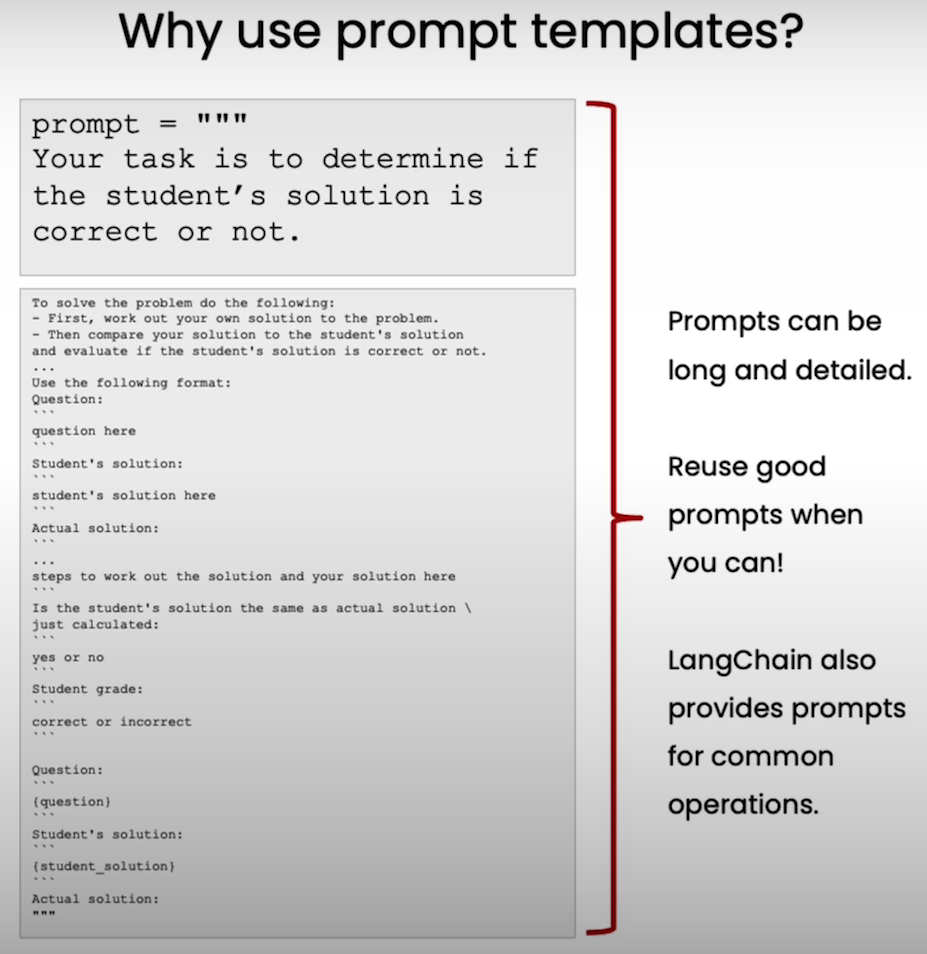

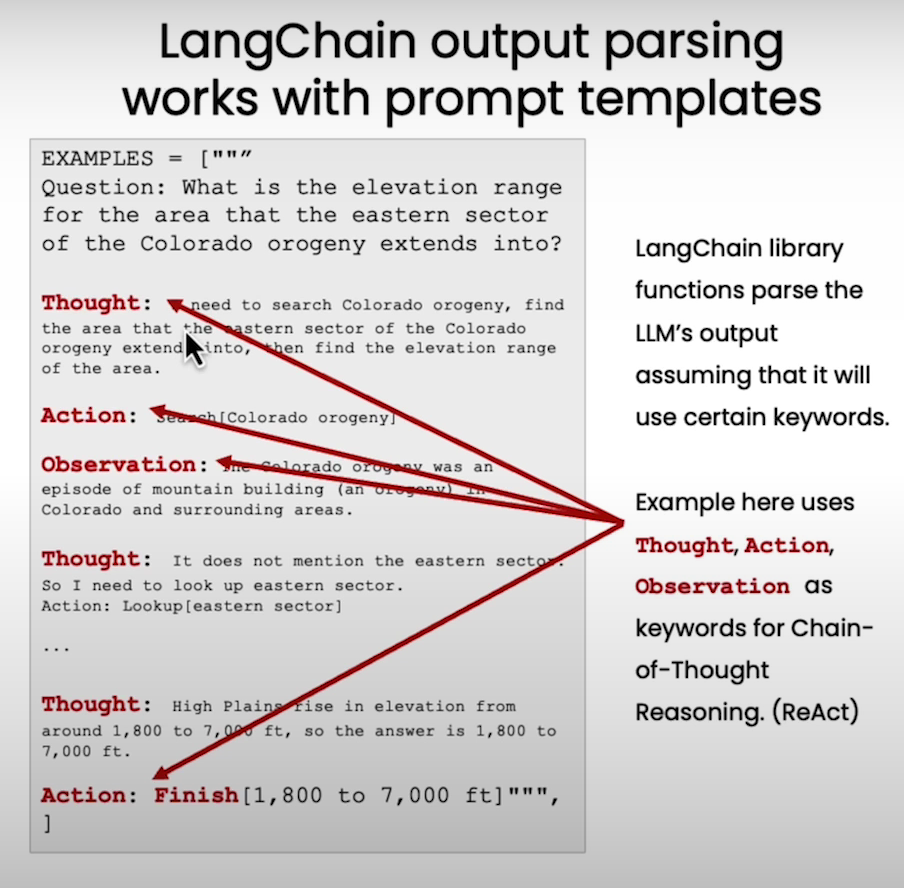

## Output Parsers

Let's start with defining how we would like the LLM output to look like:

In [40]:
{
  "gift": False,
  "delivery_days": 5,
  "price_value": "pretty affordable!"
}

{'gift': False, 'delivery_days': 5, 'price_value': 'pretty affordable!'}

In [41]:
customer_review = """\
This leaf blower is pretty amazing.  It has four settings:\
candle blower, gentle breeze, windy city, and tornado. \
It arrived in two days, just in time for my wife's \
anniversary present. \
I think my wife liked it so much she was speechless. \
So far I've been the only one using it, and I've been \
using it every other morning to clear the leaves on our lawn. \
It's slightly more expensive than the other leaf blowers \
out there, but I think it's worth it for the extra features.
"""

review_template = """\
For the following text, extract the following information:

gift: Was the item purchased as a gift for someone else? \
Answer True if yes, False if not or unknown.

delivery_days: How many days did it take for the product \
to arrive? If this information is not found, output -1.

price_value: Extract any sentences about the value or price,\
and output them as a comma separated Python list.

Format the output as JSON with the following keys:
gift
delivery_days
price_value

text: {text}
"""

In [42]:
from langchain.prompts import ChatPromptTemplate

prompt_template = ChatPromptTemplate.from_template(review_template)
print(prompt_template)

input_variables=['text'] messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['text'], template='For the following text, extract the following information:\n\ngift: Was the item purchased as a gift for someone else? Answer True if yes, False if not or unknown.\n\ndelivery_days: How many days did it take for the product to arrive? If this information is not found, output -1.\n\nprice_value: Extract any sentences about the value or price,and output them as a comma separated Python list.\n\nFormat the output as JSON with the following keys:\ngift\ndelivery_days\nprice_value\n\ntext: {text}\n'))]


In [43]:
messages = prompt_template.format_messages(text=customer_review)
chat = ChatOpenAI(temperature=0.0, model="gpt-3.5-turbo")
response = chat(messages)
print(response.content)

{
    "gift": true,
    "delivery_days": 2,
    "price_value": ["It's slightly more expensive than the other leaf blowers out there"]
}


In [44]:
type(response.content)

str

In [45]:
# You will get an error by running this line of code 
# because'gift' is not a dictionary
# 'gift' is a string
response.content.get('gift')

AttributeError: 'str' object has no attribute 'get'

### Parse the LLM output string into a Python dictionary

In [46]:
from langchain.output_parsers import ResponseSchema
from langchain.output_parsers import StructuredOutputParser

In [47]:
gift_schema = ResponseSchema(name="gift",
                             description="Was the item purchased\
                             as a gift for someone else? \
                             Answer True if yes,\
                             False if not or unknown.")
delivery_days_schema = ResponseSchema(name="delivery_days",
                                      description="How many days\
                                      did it take for the product\
                                      to arrive? If this \
                                      information is not found,\
                                      output -1.")
price_value_schema = ResponseSchema(name="price_value",
                                    description="Extract any\
                                    sentences about the value or \
                                    price, and output them as a \
                                    comma separated Python list.")

response_schemas = [gift_schema, 
                    delivery_days_schema,
                    price_value_schema]

In [48]:
output_parser = StructuredOutputParser.from_response_schemas(response_schemas)

In [49]:
format_instructions = output_parser.get_format_instructions()

In [50]:
print(format_instructions)

The output should be a markdown code snippet formatted in the following schema, including the leading and trailing "```json" and "```":

```json
{
	"gift": string  // Was the item purchased                             as a gift for someone else?                              Answer True if yes,                             False if not or unknown.
	"delivery_days": string  // How many days                                      did it take for the product                                      to arrive? If this                                       information is not found,                                      output -1.
	"price_value": string  // Extract any                                    sentences about the value or                                     price, and output them as a                                     comma separated Python list.
}
```


In [51]:
review_template_2 = """\
For the following text, extract the following information:

gift: Was the item purchased as a gift for someone else? \
Answer True if yes, False if not or unknown.

delivery_days: How many days did it take for the product\
to arrive? If this information is not found, output -1.

price_value: Extract any sentences about the value or price,\
and output them as a comma separated Python list.

text: {text}

{format_instructions}
"""

prompt = ChatPromptTemplate.from_template(template=review_template_2)

messages = prompt.format_messages(text=customer_review, 
                                format_instructions=format_instructions)

In [52]:
print(messages[0].content)

For the following text, extract the following information:

gift: Was the item purchased as a gift for someone else? Answer True if yes, False if not or unknown.

delivery_days: How many days did it take for the productto arrive? If this information is not found, output -1.

price_value: Extract any sentences about the value or price,and output them as a comma separated Python list.

text: This leaf blower is pretty amazing.  It has four settings:candle blower, gentle breeze, windy city, and tornado. It arrived in two days, just in time for my wife's anniversary present. I think my wife liked it so much she was speechless. So far I've been the only one using it, and I've been using it every other morning to clear the leaves on our lawn. It's slightly more expensive than the other leaf blowers out there, but I think it's worth it for the extra features.


The output should be a markdown code snippet formatted in the following schema, including the leading and trailing "```json" and "```

In [53]:
response = chat.invoke(messages)

In [54]:
print(response.content)

```json
{
	"gift": true,
	"delivery_days": 2,
	"price_value": ["It's slightly more expensive than the other leaf blowers out there, but I think it's worth it for the extra features."]
}
```


In [55]:
output_dict = output_parser.parse(response.content)

In [56]:
output_dict

{'gift': True,
 'delivery_days': 2,
 'price_value': ["It's slightly more expensive than the other leaf blowers out there, but I think it's worth it for the extra features."]}

In [57]:
type(output_dict)

dict

In [58]:
output_dict.get('delivery_days')

2